# An Exploration of UN data
In this project, you'll be doing some exploratory analysis on two country-level metrics, gross domestic product (GDP) per capita and overall life expectancy. After completing the guided practice section, you will have a chance to find some additional data and do some more exploring of your own.

## Guided Practice:

### 1. Download the Gross Domestic Product (GDP) per capita dataset
from http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD. Rename it to gdp_per_capita.csv and place it in the data folder of your project repository.

### 2. Create a Jupyter Notebook in the notebooks folder and name it UN_Data_Exploration.
You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.
Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from 'Code' to 'Markdown'. Here is a link to a cheat sheet showing the basics of styling text using Markdown.

### 3. In the first cell of your notebook, import the required packages with their customary aliases as follows:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Keep all imports in this cell at the top of your notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### 4. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.
After reading it in, inspect the first 10 rows and then inspect the last 10 rows.

In [2]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
5,Afghanistan,2018,2902.392113,NaN
6,Afghanistan,2017,2952.998916,NaN
7,Afghanistan,2016,2958.785399,NaN
8,Afghanistan,2015,2967.692067,NaN
9,Afghanistan,2014,3017.942544,NaN


In [4]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
8209,Zimbabwe,1999,4238.195198,NaN
8210,Zimbabwe,1998,4342.858177,NaN
8211,Zimbabwe,1997,4304.406272,NaN
8212,Zimbabwe,1996,4271.479930,NaN
8213,Zimbabwe,1995,3935.280057,NaN
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


### 5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [5]:
gdp_df = (
    gdp_df
        .drop(columns=['Value Footnotes'])
        .rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
)

### 6. How many rows and columns does gdp_df have?
What are the data types of its columns?<br>
If any of the columns are not the expected types, figure out why and fix it.

In [6]:
gdp_df.shape

(8219, 3)

In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         8219 non-null   object 
 1   Year            8219 non-null   int64  
 2   GDP_Per_Capita  8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB


### 7. Which years are represented in this dataset?
Take a look at the number of observations per year.<br>
What do you notice?

In [8]:
np.sort(gdp_df['Year'].unique())

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023])

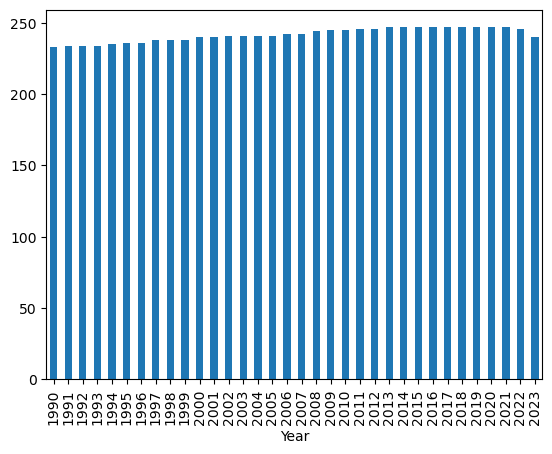

In [9]:
gdp_df.groupby("Year")["GDP_Per_Capita"].count().plot(kind="bar");

#### Answer: The number of observations per year are pretty evenly distributed.

### 8. How many countries are represented in this dataset?
Which countries are least represented in the dataset?<br>
Why do you think these countries have so few observations?

In [10]:
len(gdp_df['Country'].unique())

247

In [11]:
unique_countries = (
    gdp_df
        .groupby('Country')
        .count()
        ['GDP_Per_Capita']
)

unique_countries.nsmallest(n=20)

Country
Djibouti                       11
Turks and Caicos Islands       13
Sint Maarten (Dutch part)      15
Faroe Islands                  16
Kosovo                         16
Cayman Islands                 18
Virgin Islands                 21
Afghanistan                    24
CuraÃ§ao                       24
San Marino                     26
Montenegro                     27
Serbia                         29
West Bank and Gaza             30
Greenland                      32
Bhutan                         33
Lebanon                        33
Somalia                        33
Syrian Arab Republic           33
Tonga                          33
Africa Eastern and Southern    34
Name: GDP_Per_Capita, dtype: int64

### 9. Create a new dataframe by subsetting gdp_df to just the year 2021. Call this new dataframe gdp_2021.

In [12]:
gdp_2021 = gdp_df[gdp_df['Year'] == 2021]
gdp_2021.head()

,Country,Year,GDP_Per_Capita
2,Afghanistan,2021,2144.166570
26,Africa Eastern and Southern,2021,3934.287267
60,Africa Western and Central,2021,4698.926894
94,Albania,2021,16113.136519
128,Algeria,2021,14496.865470


### 10. Use .describe() to find the summary statistics for GDP per capita in 2021.

In [13]:
gdp_2021['GDP_Per_Capita'].describe()

count       247.000000
mean      24478.517262
std       24601.525764
min         836.665571
25%        5996.532844
50%       15900.976581
75%       37298.776853
max      135379.291201
Name: GDP_Per_Capita, dtype: float64

### 11. Create a histogram of GDP Per Capita numbers for 2021
(you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

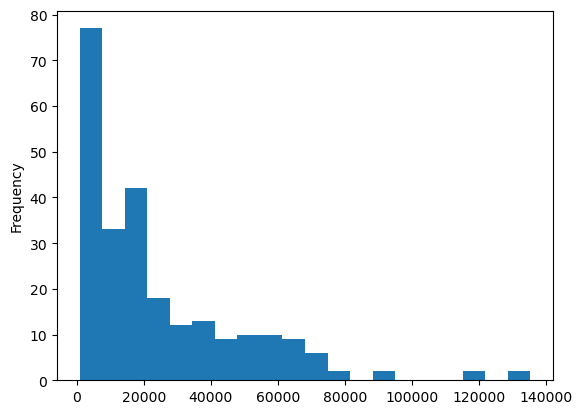

In [14]:
gdp_2021['GDP_Per_Capita'].plot(kind='hist', bins=20);

#### Answers:
* The shape is right skewed

### 12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2021.

In [15]:
gdp_2021.nlargest(n=5, columns="GDP_Per_Capita", keep='all')

,Country,Year,GDP_Per_Capita
4425,Luxembourg,2021,135379.291201
6513,Singapore,2021,131864.092336
3492,Ireland,2021,118594.746862
6118,Qatar,2021,116832.570290
740,Bermuda,2021,92276.234605


In [16]:
gdp_2021.nsmallest(n=5, columns="GDP_Per_Capita", keep='all')

,Country,Year,GDP_Per_Capita
1045,Burundi,2021,836.665571
1301,Central African Republic,2021,1128.552380
1733,Dem. Rep. Congo,2021,1313.618218
6698,Somalia,2021,1392.464262
5132,Mozambique,2021,1457.235409


### 13. Now, return to the full dataset, gdp_df.
Pivot the data for 1990 and 2021 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named gdp_pivoted.

In [17]:
gdp_pivoted = (
    gdp_df
        [(gdp_df['Year'] == 1990) | (gdp_df['Year'] == 2021)]
        .pivot_table(values='GDP_Per_Capita', index=['Country'], columns=['Year'])
        .dropna()
)

### 14. Create a new column in gdp_pivoted named Percent_Change.
This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [18]:
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2021] - gdp_pivoted[1990]) / gdp_pivoted[1990]
gdp_pivoted.head()

Year,1990,2021,Percent_Change
Country,,,
Africa Eastern and Southern,3386.854480,3934.287267,16.163458
Africa Western and Central,3299.401375,4698.926894,42.417559
Albania,5327.747458,16113.136519,202.438069
Algeria,11728.545729,14496.865470,23.603265
Andorra,50036.300776,59332.202910,18.578316


### 15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?

In [19]:
(gdp_pivoted['Percent_Change'] < 0).sum()

np.int64(23)

### 16. Which country had the highest % change in GDP per capita?
Create a line plot showing this country's GDP per capita for all years from 1990 to 2018. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.

In [20]:
top_2_countries = gdp_pivoted.nlargest(n=2, columns='Percent_Change')
top_2_countries.head()

Year,1990,2021,Percent_Change
Country,,,
Equatorial Guinea,1122.817674,16821.448647,1398.146052
China,1645.578944,20406.729658,1140.094237


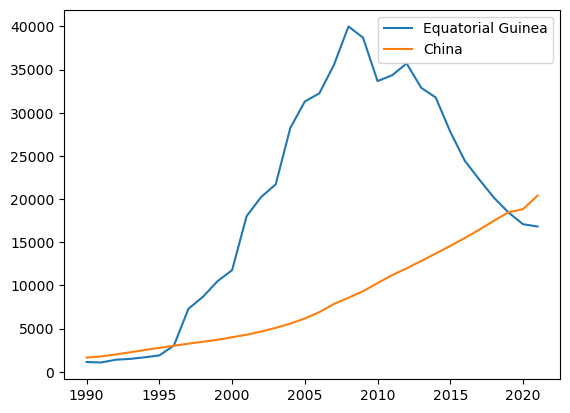

In [21]:
for country in top_2_countries.index:
    plt.plot(
        'Year',
        'GDP_Per_Capita',
        data=(
            gdp_df
                .loc[gdp_df['Country'] == country]
                .loc[(gdp_df['Year'] >= 1990) & (gdp_df['Year'] <= 2021)]),
        label=country
    )
plt.legend();
# plt.show();

### 17. Read in continents.csv contained in the data folder into a new dataframe called continents.
We will be using this dataframe to add a new column to our dataset.

In [22]:
continents_df = pd.read_csv('../data/continents.csv')
continents_df.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


### 18. Merge gdp_df and continents. Keep only the countries that appear in both data frames.
Save the result back to gdp_df.

In [23]:
gdp_df = gdp_df.merge(right=continents_df, how='inner', on='Country')
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2023,1992.424394,Asia
1,Afghanistan,2022,1981.710168,Asia
2,Afghanistan,2021,2144.166570,Asia
3,Afghanistan,2020,2769.685745,Asia
4,Afghanistan,2019,2927.245144,Asia


### 19. Determine the number of countries per continent.
Create a bar chart showing this.

In [24]:
countries_per_continent = (
    gdp_df
        .groupby('Continent')['Country']
        .nunique()
)
countries_per_continent.head()

Continent
Africa           50
Asia             41
Europe           45
North America    26
Oceania          14
Name: Country, dtype: int64

<Axes: xlabel='Continent'>

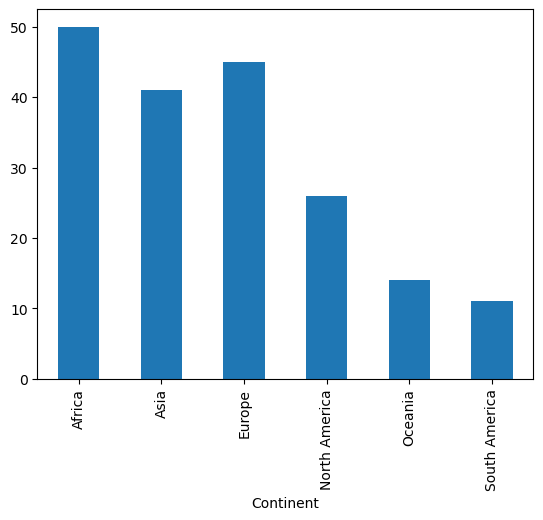

In [25]:
countries_per_continent.plot(kind='bar')

### 20. Create a seaborn boxplot showing GDP per capita in 2021 split out by continent.
What do you notice?

<Axes: xlabel='GDP_Per_Capita', ylabel='Continent'>

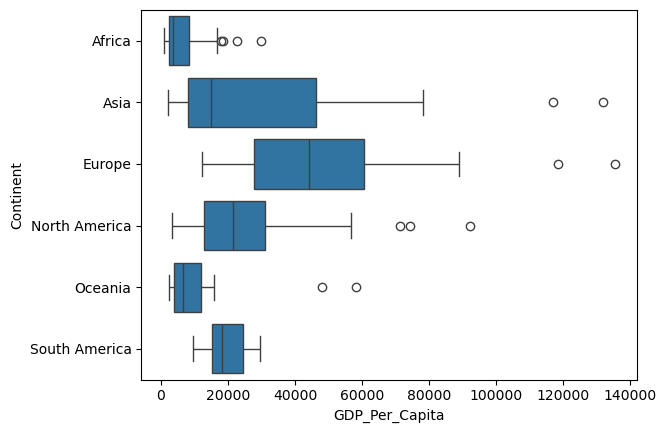

In [26]:
sns.boxplot(
    data=gdp_df[gdp_df['Year'] == 2021].sort_values(by='Continent'),
    x='GDP_Per_Capita',
    y='Continent'
)

#### ANSWER: The data looks as I expected.

### 21. Download the full csv containing Life expectancy at birth, total (years) from https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false.
Read this data into a DataFrame named life_expectancy. Note: When reading this dataset it, you may encounter an error. Modify your read_csv call to correct this without modifying the original csv file.

In [27]:
life_expectancy_df = pd.read_csv('../data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_22997.csv',
                                 skiprows=3,
                                 on_bad_lines='skip')
life_expectancy_df.shape

(266, 70)

### 22. Drop the Country Code, Indicator Name, and Indicator Code columns.
Then use .melt() to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to Country, Year, and Life_Expectancy.

In [28]:
life_expectancy_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', 'Unnamed: 69'],
      dtype='object')

In [29]:
life_expectancy_df = life_expectancy_df.melt(
    id_vars=life_expectancy_df.columns[0:4],
    value_vars=life_expectancy_df.columns[4:-1],
    var_name='Year',
    value_name='Life_Expectancy'
)

In [30]:
life_expectancy_df = life_expectancy_df.rename(columns={'Country Name': 'Country'})
life_expectancy_df.head()

,Country,Country Code,Indicator Name,Indicator Code,Year,Life_Expectancy
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,64.049000
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,44.169658
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,32.799000
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,37.779636
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,37.933000


### 23. What was the first country with a life expectancy to exceed 80?

In [31]:
(
    life_expectancy_df[life_expectancy_df['Life_Expectancy'] > 80.0]
        .sort_values(by='Year')['Country']
        .iloc[0]
)

'Monaco'

### 24. Merge gdp_df and life_expectancy, keeping all countries and years that appear in both DataFrames.
Save the result to a new DataFrame named gdp_le. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [32]:
life_expectancy_df['Year'] = pd.to_numeric(life_expectancy_df['Year'])

In [33]:
gdp_le = pd.merge(
    left=gdp_df,
    right=life_expectancy_df,
    how='outer',
    left_on=['Country', 'Year'],
    right_on=['Country', 'Year']
)
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Country Code,Indicator Name,Indicator Code,Life_Expectancy
0,Afghanistan,1960,NaN,NaN,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.799
1,Afghanistan,1961,NaN,NaN,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.291
2,Afghanistan,1962,NaN,NaN,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.757
3,Afghanistan,1963,NaN,NaN,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,34.201
4,Afghanistan,1964,NaN,NaN,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,34.673
...,...,...,...,...,...,...,...,...
17692,Zimbabwe,2020,2987.269823,Africa,ZWE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,61.530
17693,Zimbabwe,2021,3184.785451,Africa,ZWE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,60.135
17694,Zimbabwe,2022,3323.121932,Africa,ZWE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.360
17695,Zimbabwe,2023,3442.251327,Africa,ZWE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.775


### 25. Create a new DataFrame, named gdp_le_2021 by extracting data for the year 2021 from gdp_le.
How many countries have a life expectancy of at least 80 in 2021?

In [34]:
gdp_le_2021 = gdp_le[gdp_le['Year']==2021]
gdp_le_2021.head()

,Country,Year,GDP_Per_Capita,Continent,Country Code,Indicator Name,Indicator Code,Life_Expectancy
61,Afghanistan,2021,2144.166570,Asia,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,60.417000
126,Africa Eastern and Southern,2021,NaN,NaN,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.979999
191,Africa Western and Central,2021,NaN,NaN,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,57.362572
256,Albania,2021,16113.136519,Europe,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,76.844000
321,Algeria,2021,14496.865470,Africa,DZA,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,75.208000


In [35]:
gdp_le_2021[gdp_le_2021['Life_Expectancy'] >= 80.0]['Country'].count()

np.int64(44)

### 26. Find the countries that had the top 3 largest GDP per capita figures for 2021.
Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [36]:
top_3_countries_gdp_2021 = gdp_le_2021.nlargest(n=3, columns='GDP_Per_Capita', keep='all')['Country'].to_list()
top_3_countries_gdp_2021

['Luxembourg', 'Singapore', 'Ireland']

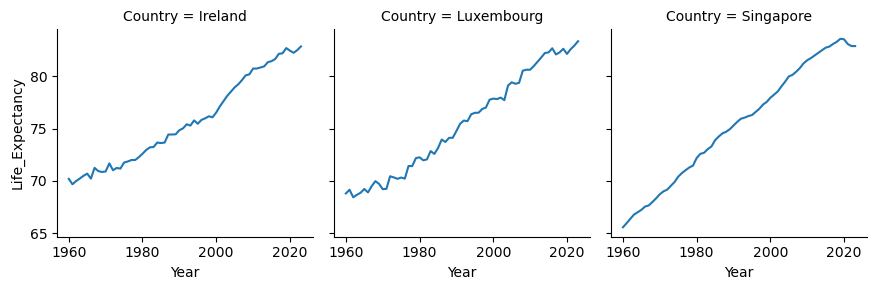

In [37]:
(
    sns
        .FacetGrid(data=gdp_le[gdp_le['Country'].isin(values=top_3_countries_gdp_2021)], col='Country')
        .map(plt.plot, 'Year', 'Life_Expectancy')
);

### 27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2021.

 What do you notice?

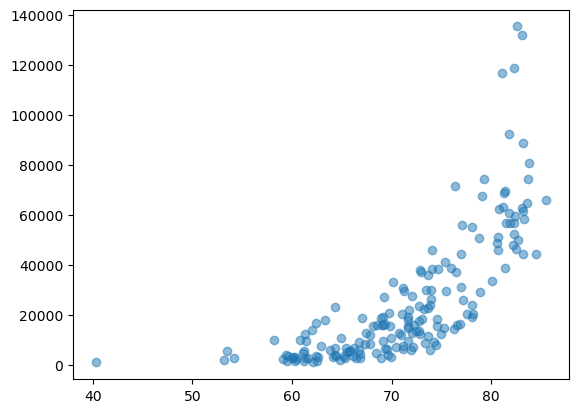

In [38]:
plt.scatter(data=gdp_le_2021, x='Life_Expectancy', y='GDP_Per_Capita', alpha=0.5);

#### Answer: Lifespan is an asymptote

### 28. Find the correlation between Life Expectancy and GDP per Capita for the year 2021.
What is the meaning of this number?

In [39]:
gdp_le_2021.corr(numeric_only=True)

,Year,GDP_Per_Capita,Life_Expectancy
Year,NaN,NaN,NaN
GDP_Per_Capita,NaN,1.000000,0.752785
Life_Expectancy,NaN,0.752785,1.000000


#### Answer: Correlation shows how strong of a relationship there is between to variables

### 29. Add a column to gdp_le_2021 and calculate the logarithm of GDP per capita.
Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

In [42]:
gdp_le_2021['GDP_Per_Capita_log'] = np.log(gdp_le_2021['GDP_Per_Capita'])
gdp_le_2021.corr(numeric_only=True)

C:\Users\shann\AppData\Local\Temp\ipykernel_9152\2532264395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2021['GDP_Per_Capita_log'] = np.log(gdp_le_2021['GDP_Per_Capita'])


,Year,GDP_Per_Capita,Life_Expectancy,GDP_Per_Capita_log
Year,NaN,NaN,NaN,NaN
GDP_Per_Capita,NaN,1.000000,0.752785,0.856510
Life_Expectancy,NaN,0.752785,1.000000,0.849065
GDP_Per_Capita_log,NaN,0.856510,0.849065,1.000000


#### ANSWER: The log correlation is stronger

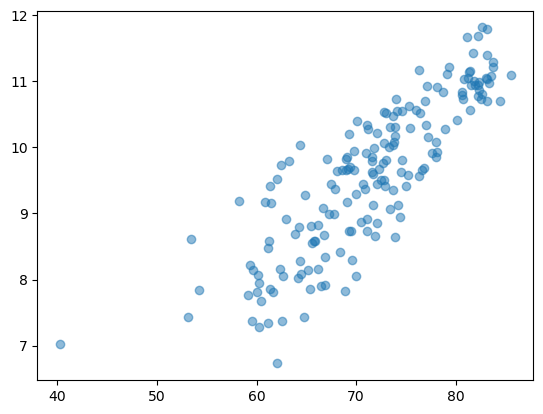

In [43]:
plt.scatter(data=gdp_le_2021, x='Life_Expectancy', y='GDP_Per_Capita_log', alpha=0.5);

## Bonus: Solo Exploration:
### 1. Choose and download another data set from the UN data http://data.un.org/Explorer.aspx to explore.
You may want to combine your new dataset with one or both of the datasets that you already worked with. Report any interesting correlations or trends that you find.

### 2. If time allows, check out the plotly library to add additional interativity to your plots.
https://plotly.com/python/plotly-express/.